In [1]:
import pandas as pd
df= pd.read_csv("price prediction/model/Bengaluru_House_Data.csv")

In [2]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df.total_sqft.dtype

dtype('O')

In [4]:
def to_float(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
        
    

In [5]:
df.total_sqft = df.total_sqft.apply(to_float)
df = df[df.total_sqft.notnull()]

df.shape

(13274, 9)

In [6]:
df['pps'] = (df['price']*100000)/df['total_sqft']

In [7]:
df.pps.describe()

count    1.327400e+04
mean     7.907501e+03
std      1.064296e+05
min      2.678298e+02
25%      4.266865e+03
50%      5.434306e+03
75%      7.311746e+03
max      1.200000e+07
Name: pps, dtype: float64

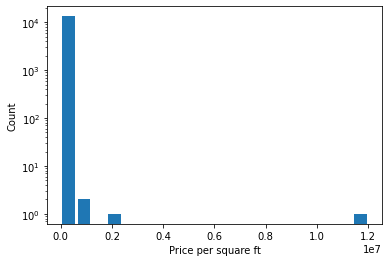

In [8]:
import matplotlib.pyplot as plt
plt.hist(df.pps, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()

In [9]:
lower_limit, upper_limit = df.pps.quantile([0.001, 0.999])
lower_limit, upper_limit

(1189.4166666666667, 50903.23232323291)

In [10]:
df1= df[(df.pps<upper_limit) & (df.pps>lower_limit)]
df1.shape

(13246, 10)

In [11]:
mean=df1.pps.mean()
std= df1.pps.std()


In [12]:
mean,std

(6657.916892666258, 4135.861156142763)

In [13]:
min_limit= mean - 4*std
max_limit= mean + 4*std

min_limit,max_limit

(-9885.527731904796, 23201.36151723731)

In [14]:
df2 = df1[(df1.pps>min_limit) & (df1.pps<max_limit)]
df2.shape

(13119, 10)

In [15]:
df2.pps.describe()

count    13119.000000
mean      6442.185460
std       3479.288419
min       1250.000000
25%       4258.586679
50%       5411.954766
75%       7216.201968
max      23200.000000
Name: pps, dtype: float64

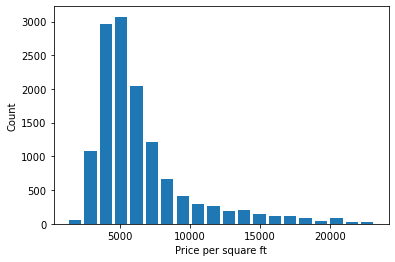

In [16]:
plt.hist(df2.pps, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()

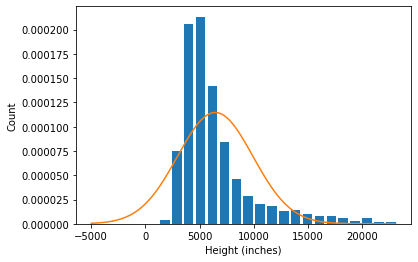

In [17]:
from scipy.stats import norm
import numpy as np

plt.hist(df2.pps, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')

rng = np.arange(-5000, df2.pps.max(), 100)
plt.plot(rng, norm.pdf(rng,df2.pps.mean(),df2.pps.std()))

In [18]:
df1['zscore'] = (df1.pps-df1.pps.mean())/df1.pps.std()

C:\Users\HP\anaconda3\envs\tf-gpu\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [20]:
df3= df1[(df1.zscore>-4)&(df1.zscore<4)]
df3.shape

(13119, 11)